In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from math import sqrt

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('test.csv', sep=',')
display(test.head())

target = test.loc[:,'price']
features = test.drop('price',axis=1)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,waterfront_1,view_1,view_2,view_3,view_4,renovated,price
0,0.441045,-0.289026,0.495242,-1.083461,1.391653,-0.078747,0.247277,-0.229651,-0.863526,0,0,0,0,0,0,12.807653
1,-2.277895,-0.732714,0.233528,-0.476097,-0.452159,-0.463170,0.139263,0.316892,-0.425904,0,0,0,0,0,0,12.323856
2,-2.392374,1.135619,0.367226,-0.069253,0.356438,-0.526963,-1.367954,0.109082,-0.021967,0,0,0,0,0,0,12.860869
3,-0.702766,1.373729,-0.885323,0.797529,-1.153960,-1.753341,-0.211855,-0.108074,-0.074549,0,0,0,0,0,0,13.396200
4,1.476062,0.847752,-0.114008,0.905910,2.492017,1.097527,-1.206421,0.386734,-0.216027,0,0,0,0,0,0,13.773646


# Eigenvectors

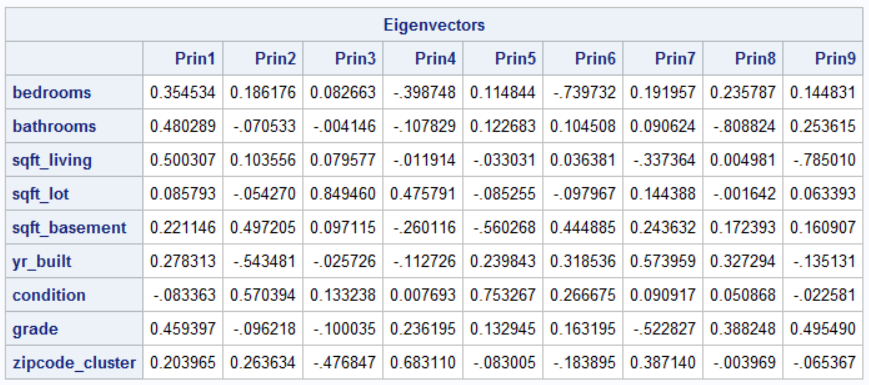

# SAS Regression Model

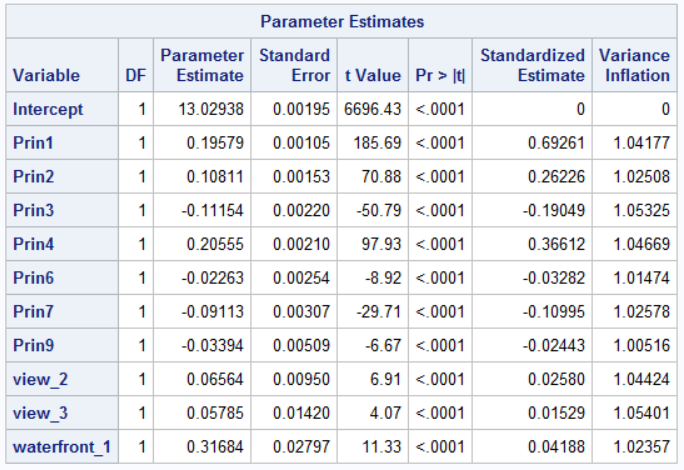

# Make Predictions on Unseen Test Data

In [3]:
features = features.drop(['Prin5','Prin8','view_1','view_4','renovated'], axis=1) #drop statistically insignificant features

# betas and intercept from SAS model
reg_params = pd.read_csv('model_params.csv',sep=',')
betas = reg_params.iloc[:,5:-1].T #transpose to get a colum vector
betas = list(betas.iloc[:,0]) #convert to a list

intercept = list(reg_params.iloc[:,4])[0]

betas_vector = pd.Series(data=betas) #convert the above list of betas to a Pandas Series

matmul = np.matmul(features,betas_vector) #dot product to apply betas to feature values
matmul = pd.DataFrame(matmul)
pred = matmul + intercept #add the intercept back

y_pred = np.exp(pred) #scale predictions back to original range
target = np.exp(target) #scale test data back


print('The RMSE squared is: ' + str(sqrt(mean_squared_error(target, y_pred))))
print('The R squared is: ' + str(r2_score(target, y_pred)))
print('The MAE is: ' + str(mean_absolute_error(target, y_pred)))
print('The median absolute error is: ' + str(median_absolute_error(target, y_pred)))


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('The MAPE is: ' + str(mean_absolute_percentage_error(target, y_pred)))


The RMSE squared is: 186507.2934634541
The R squared is: 0.7380137330000078
The MAE is: 105534.61827485175
The median absolute error is: 67683.20619523354
The MAPE is: 66.61643050459605


#### The error metrics increase slightly relative to the training data - this indicates slight overfitting. The model accuracy holds for the most part

In [4]:
#y_pred = exponentiated predictions
y_pred = y_pred.values
y_pred = y_pred.flatten()

target = pd.Series(data=target)

#Residual = observed value - predicted value
residuals = target - y_pred

residuals.head()

0    -2727.715919
1   -15988.263218
2    34885.901926
3    20527.834669
4    66849.750674
Name: price, dtype: float64

# Residual Distributions

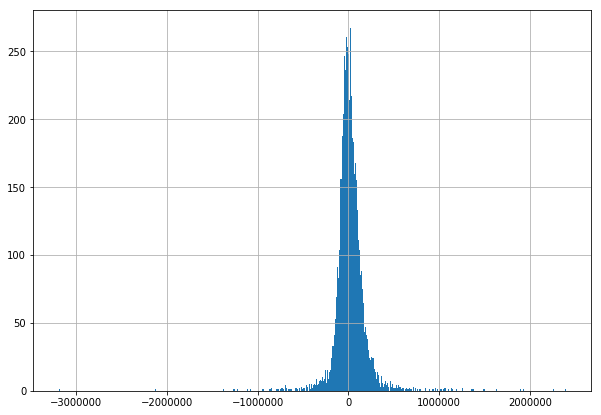

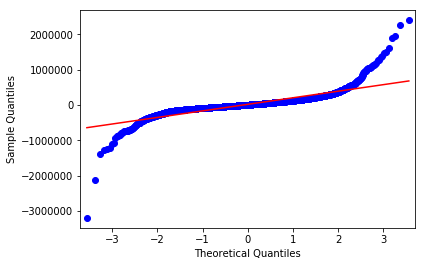

In [8]:
residuals.hist(figsize = (10,7), bins=500)
qqplot(residuals, line='s')
pyplot.show()

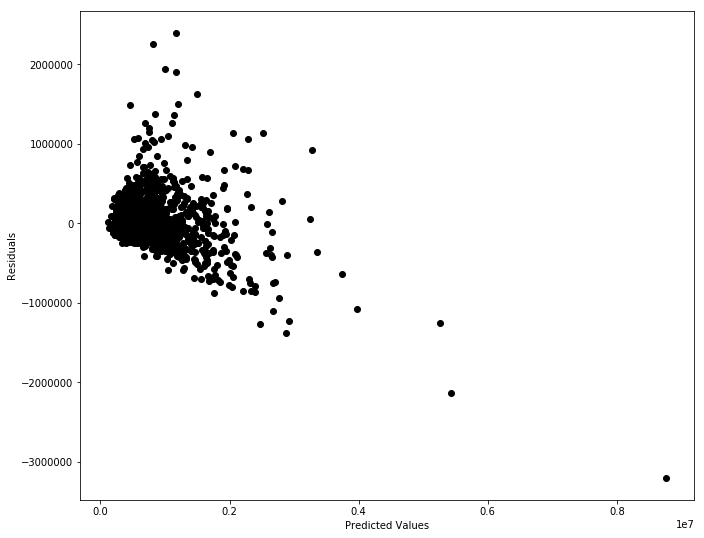

In [6]:
plt.figure(figsize=(11,9))
pyplot.xlabel('Predicted Values')
pyplot.ylabel('Residuals')
plt.plot(y_pred, residuals, 'o', color='black');

## Residual Distribution After Filtering Outliers

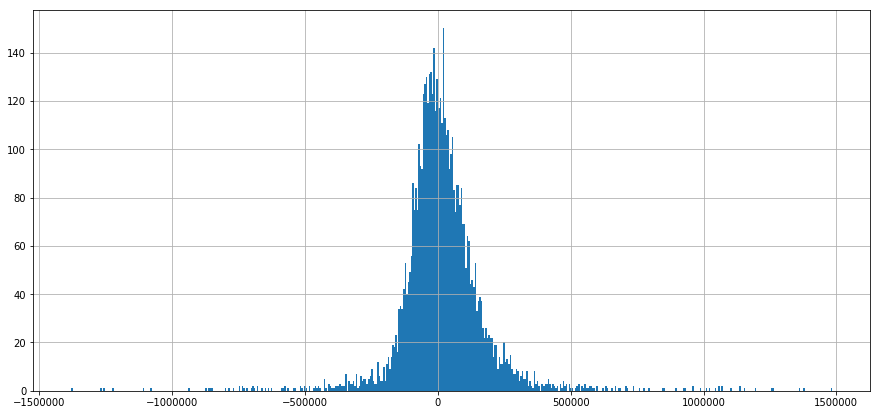

In [7]:
filtered = []
for res in residuals:
    if res > -1500000 and res < 1500000: #remove outlier residuals
        filtered.append(res)

filtered = pd.Series(filtered)

filtered.hist(figsize=(15,7),bins=500)